In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [4]:

# Gerar dados para otimização do tamanho de embalagens

np.random.seed(1)

df = pd.DataFrame({

    'ID do Produto': range(1, 101),

    'Altura': np.random.uniform(5, 50, 100),

    'Largura': np.random.uniform(5, 50, 100),

    'Profundidade': np.random.uniform(5, 50, 100),

    'Peso do Produto': np.random.uniform(0.5, 25, 100),

    'Material de Embalagem': np.random.choice(['Papelão', 'Plástico', 'Isopor'], 100),

    'Custo por Unidade de Material': np.random.uniform(0.1, 1.0, 100),

    'Volume de Vendas': np.random.randint(100, 1000, 100)

})



# Exibir os primeiros registros

df.head()

,ID do Produto,Altura,Largura,Profundidade,Peso do Produto,Material de Embalagem,Custo por Unidade de Material,Volume de Vendas
0,1,23.765990,19.699021,47.757925,20.390538,Papelão,0.984176,567
1,2,37.414602,28.717615,30.049393,21.936560,Papelão,0.339975,395
2,3,5.005147,44.867394,46.202286,17.366125,Plástico,0.580288,966
3,4,18.604966,21.077139,33.870479,14.452613,Isopor,0.383020,227
4,5,11.604015,45.884082,22.550347,4.443800,Papelão,0.919696,371


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID do Produto                  100 non-null    int64  
 1   Altura                         100 non-null    float64
 2   Largura                        100 non-null    float64
 3   Profundidade                   100 non-null    float64
 4   Peso do Produto                100 non-null    float64
 5   Material de Embalagem          100 non-null    object 
 6   Custo por Unidade de Material  100 non-null    float64
 7   Volume de Vendas               100 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 6.0+ KB


In [6]:
df['ID do Produto'] = df['ID do Produto'].astype(str)

In [7]:
df.describe()

,Altura,Largura,Profundidade,Peso do Produto,Custo por Unidade de Material,Volume de Vendas
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26.864507,26.817757,29.961995,12.997766,0.545918,506.460000
std,13.314811,14.302286,12.520033,6.903709,0.262223,262.892513
min,5.005147,5.565019,5.018091,1.047095,0.108414,101.000000
25%,14.442537,13.771881,20.497507,6.742854,0.335645,263.000000
50%,26.183419,29.834829,30.812000,13.544615,0.550796,496.500000
75%,37.478429,38.886607,41.155743,18.887526,0.748164,745.250000
max,49.498749,49.879528,49.226770,24.850869,0.997078,979.000000


In [8]:
df['ID do Produto'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'],
      dtype=object)

In [9]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
corr

,Altura,Largura,Profundidade,Peso do Produto,Custo por Unidade de Material
Altura,1.000000,-0.024866,-0.042988,0.241418,-0.027071
Largura,-0.024866,1.000000,0.071924,-0.092579,0.006395
Profundidade,-0.042988,0.071924,1.000000,-0.076123,0.201605
Peso do Produto,0.241418,-0.092579,-0.076123,1.000000,0.143542
Custo por Unidade de Material,-0.027071,0.006395,0.201605,0.143542,1.000000


In [10]:
# Criando a feature 'Volume do Produto'
df['Volume do Produto'] = df['Altura'] * df['Largura'] * df['Profundidade']

In [11]:
# Criando a feature 'Densidade do Produto'
df['Densidade do Produto'] = df['Peso do Produto'] / df['Volume do Produto']

In [12]:
media_custo_por_material = df.groupby('Material de Embalagem')['Custo por Unidade de Material'].mean()

print(media_custo_por_material)

Material de Embalagem
Isopor      0.566766
Papelão     0.553400
Plástico    0.518422
Name: Custo por Unidade de Material, dtype: float64


In [13]:
df['Material de Embalagem'].unique()

array(['Papelão', 'Plástico', 'Isopor'], dtype=object)

Text(0.5, 1.0, 'Distribuição do Volume do Produto')

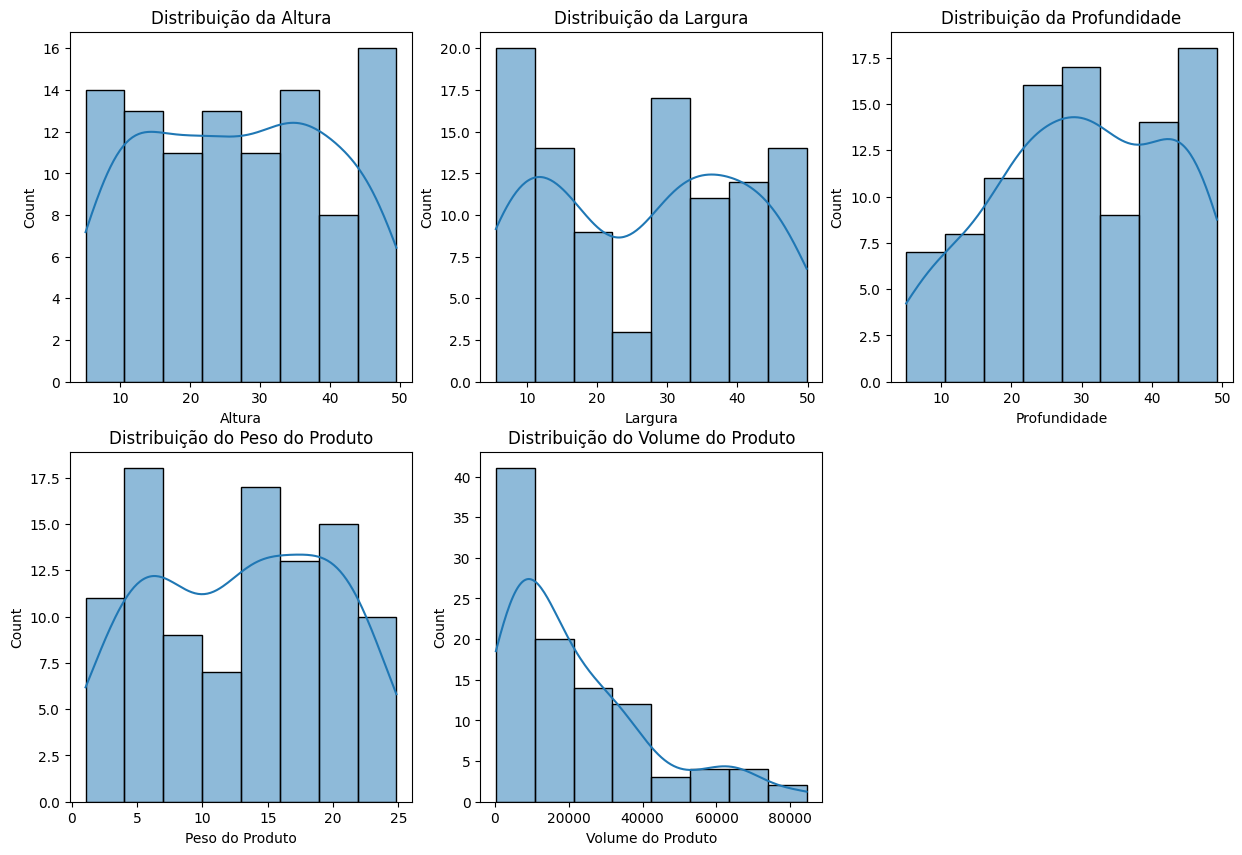

In [14]:
# 1. Histogramas
plt.figure(figsize=(15, 10))

# Histograma para 'Altura'
plt.subplot(2, 3, 1)
sns.histplot(df['Altura'], kde=True)
plt.title('Distribuição da Altura')

# Histograma para 'Largura'
plt.subplot(2, 3, 2)
sns.histplot(df['Largura'], kde=True)
plt.title('Distribuição da Largura')

# Histograma para 'Profundidade'
plt.subplot(2, 3, 3)
sns.histplot(df['Profundidade'], kde=True)
plt.title('Distribuição da Profundidade')

# Histograma para 'Peso do Produto'
plt.subplot(2, 3, 4)
sns.histplot(df['Peso do Produto'], kde=True)
plt.title('Distribuição do Peso do Produto')

# Histograma para 'Volume do Produto'
plt.subplot(2, 3, 5)
sns.histplot(df['Volume do Produto'], kde=True)
plt.title('Distribuição do Volume do Produto')



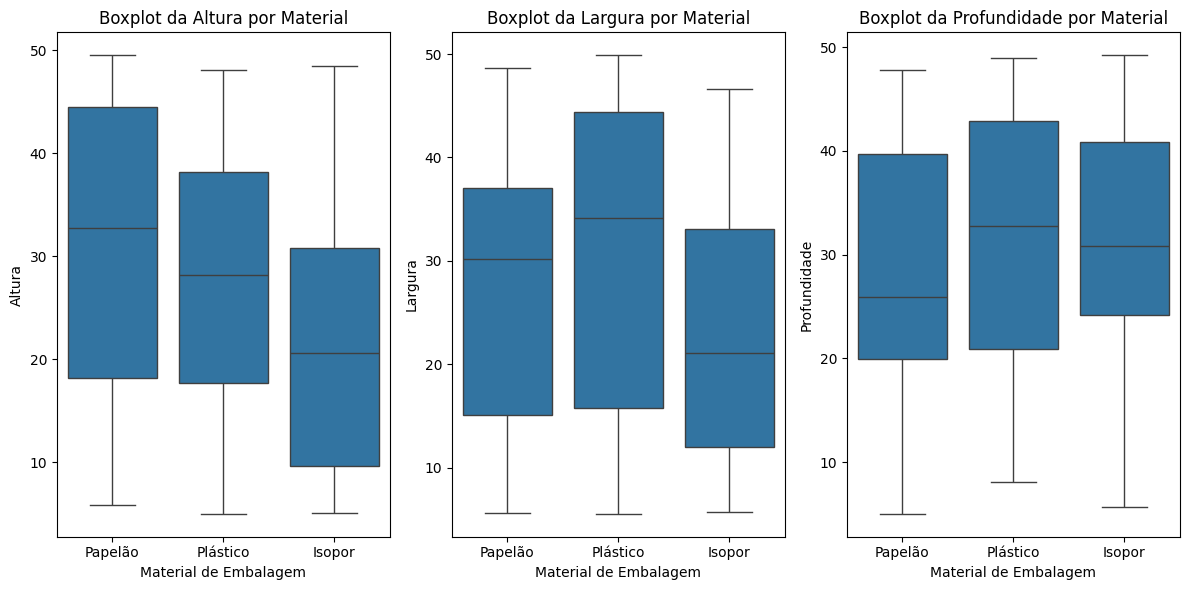

In [15]:
# 2. Boxplots
plt.figure(figsize=(12, 6))

# Boxplot para 'Altura' por 'Material de Embalagem'
plt.subplot(1, 3, 1)
sns.boxplot(x='Material de Embalagem', y='Altura', data=df)
plt.title('Boxplot da Altura por Material')

# Boxplot para 'Largura' por 'Material de Embalagem'
plt.subplot(1, 3, 2)
sns.boxplot(x='Material de Embalagem', y='Largura', data=df)
plt.title('Boxplot da Largura por Material')

# Boxplot para 'Profundidade' por 'Material de Embalagem'
plt.subplot(1, 3, 3)
sns.boxplot(x='Material de Embalagem', y='Profundidade', data=df)
plt.title('Boxplot da Profundidade por Material')

plt.tight_layout()
plt.show()


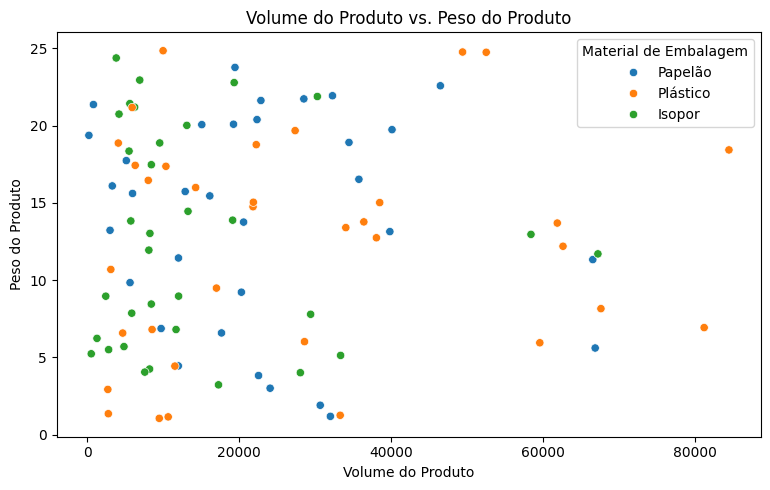

In [16]:
# 3. Scatter Plots (Exemplos)
plt.figure(figsize=(15, 5))

# Scatter Plot 'Volume do Produto' vs. 'Peso do Produto'
plt.subplot(1, 2, 1)
sns.scatterplot(x='Volume do Produto', y='Peso do Produto', hue='Material de Embalagem', data=df)
plt.title('Volume do Produto vs. Peso do Produto')

plt.tight_layout()
plt.show()

In [21]:
df.to_csv('dataset.csv')

### Modelo

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [30]:

df = pd.get_dummies(df, columns=['Material de Embalagem'], prefix='Material')



In [31]:
df.head()

,ID do Produto,Altura,Largura,Profundidade,Peso do Produto,Custo por Unidade de Material,Volume de Vendas,Volume do Produto,Densidade do Produto,Material_Isopor,Material_Papelão,Material_Plástico
0,1,23.765990,19.699021,47.757925,20.390538,0.984176,567,22358.671763,0.000912,False,True,False
1,2,37.414602,28.717615,30.049393,21.936560,0.339975,395,32286.815012,0.000679,False,True,False
2,3,5.005147,44.867394,46.202286,17.366125,0.580288,966,10375.550230,0.001674,False,False,True
3,4,18.604966,21.077139,33.870479,14.452613,0.383020,227,13281.951276,0.001088,True,False,False
4,5,11.604015,45.884082,22.550347,4.443800,0.919696,371,12006.697298,0.000370,False,True,False


In [32]:
# 2. Separar as Features (X) e o Target (y)
features = ['Altura', 'Largura', 'Profundidade', 'Peso do Produto',
            'Custo por Unidade de Material', 'Volume de Vendas',
            'Material_Papelão', 'Material_Plástico', 'Material_Isopor']
X = df[features]
y = df[['Altura', 'Largura', 'Profundidade']]  # Prever as 3 dimensões


In [33]:

# 3. Dividir os Dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# 4. Criar e Treinar o Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)  # Inicializa o modelo
modelo_rf.fit(X_train, y_train)  # Treina o modelo



RandomForestRegressor(random_state=42)

In [36]:
# 5. Fazer Previsões
y_pred = modelo_rf.predict(X_test)

# 6. Avaliar o Modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 3.930844447631077


In [37]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (carregar dados, feature engineering e one-hot encoding como no código anterior) ...



# 2. Definir os Hiperparâmetros a Serem Testados
parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# 3. Criar o Modelo Base
modelo_rf = RandomForestRegressor(random_state=42)

In [38]:


# 4. Fazer a Busca em Grade com Validação Cruzada
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# 5. Obter o Melhor Modelo
melhor_modelo = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_s

In [39]:

# 6. Fazer Previsões com o Melhor Modelo
y_pred = melhor_modelo.predict(X_test)

# 7. Avaliar o Modelo
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("-----------------------------------")
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

# (Opcional) Visualizar as previsões e comparar com os valores reais
# ...

Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
-----------------------------------
RMSE: 3.9126113441047026
MAE: 2.9851825044248717
R²: 0.8992054294220777


In [43]:
from scipy.optimize import minimize

In [171]:
def calcular_custo_embalagem(material, altura, largura, profundidade, custo_por_unidade):
    area = (2 * altura * largura) + (2 * altura * profundidade) + (2 * largura * profundidade)
    custo_total = area * custo_por_unidade
    return custo_total

In [167]:
def custo_embalagem(dimensoes, material_papelao, material_plastico, material_isopor, custo_material):
    altura, largura, profundidade = dimensoes

    print(f"Iteração: Dimensões: {altura:.2f}, {largura:.2f}, {profundidade:.2f}")

    # Determinar o material a partir das colunas codificadas
    if material_papelao:
        material = 'Papelão'
    elif material_plastico:
        material = 'Plástico'
    elif material_isopor:
        material = 'Isopor'
    else:
        material = 'Desconhecido'  # Tratar caso nenhum material seja selecionado

    # Calcular o custo do material com base nas dimensões e tipo de material
    custo_material_total = calcular_custo_embalagem(material, altura, largura, profundidade, custo_material)

    print(f"Custo Total: {custo_material_total:.2f}")
    return custo_material_total


In [230]:
calcular_custo_embalagem("Isopor", 5, 7, 25, 0.15)

100.5

In [197]:
def custo_embalagem(dimensoes, material_papelao, material_plastico, material_isopor, custo_material):
    altura, largura, profundidade = dimensoes

    print(f"Iteração: Dimensões: {altura:.2f}, {largura:.2f}, {profundidade:.2f}")

    # Definir o custo por unidade de área com base no material (ajuste os valores)
    if material_papelao:
        custo_por_unidade = 0.553400
        material = 'Papelão'
    elif material_plastico:
        custo_por_unidade = 0.518422
        material = 'Plástico'
    elif material_isopor:
        custo_por_unidade = 0.566766
        material = 'Isopor'
    else:
      custo_por_unidade = 0
      material = 'Desconhecido'


    # Calcular o custo do material usando o custo por unidade correto
    custo_material_total = calcular_custo_embalagem(
        material, altura, largura, profundidade, custo_por_unidade
    )

    print(f"Custo Total: {custo_material_total:.2f}")
    return custo_material_total


In [231]:
# 2. Função para Recomendar Dimensões com Otimização
def recomendar_dimensoes(produto, custo_material):
    # Obter previsões do modelo para cada dimensão
    dimensoes_iniciais = [25,25,25]
    dimensoes_previstas = melhor_modelo.predict(produto)[0]

    # Definir limites para as dimensões (restrições)
    limites = [(10, 100), (10, 100), (10, 100)]  # Exemplo: dimensões mínimas e máximas

    # Otimizar as dimensões usando a função de custo
    resultado_otimizacao = minimize(
        custo_embalagem,
        dimensoes_iniciais,

        args=(produto['Material_Papelão'].iloc[0],
              produto['Material_Plástico'].iloc[0],
              produto['Material_Isopor'].iloc[0],
              custo_material)

    )

    dimensoes_otimas = resultado_otimizacao.x
    return dimensoes_otimas



In [232]:
# 3. Exemplo de Uso
novo_produto = pd.DataFrame({
    'Altura': [5],  # Valor inicial, será otimizado
    'Largura': [8],  # Valor inicial, será otimizado
    'Profundidade': [25],  # Valor inicial, será otimizado
    'Peso do Produto': [2.5],
    'Custo por Unidade de Material': [0.01],
    'Volume de Vendas': [1000],
    'Material de Embalagem': ['Papelão']


}, index=[0])


In [233]:
if novo_produto['Material de Embalagem'].iloc[0] == 'Papelão':
  novo_produto = pd.get_dummies(novo_produto, columns=['Material de Embalagem'], prefix='Material')
  novo_produto['Material_Plástico'] = 0
  novo_produto['Material_Isopor'] = 0
  novo_produto['Material_Papelão'] = 1

elif novo_produto['Material de Embalagem'].iloc[0] == 'Plástico':
  novo_produto = pd.get_dummies(novo_produto, columns=['Material de Embalagem'], prefix='Material')
  novo_produto['Material_Papelão'] = 0
  novo_produto['Material_Isopor'] = 0
  novo_produto['Material_Plástico'] = 1

elif novo_produto['Material de Embalagem'].iloc[0] == 'Isopor':
  novo_produto = pd.get_dummies(novo_produto, columns=['Material de Embalagem'], prefix='Material')
  novo_produto['Material_Papelão'] = 0
  novo_produto['Material_Plástico'] = 0
  novo_produto['Material_Isopor'] = 1



In [234]:
colunas_treinamento = melhor_modelo.feature_names_in_

In [235]:
novo_produto = novo_produto[colunas_treinamento]

In [236]:
novo_produto.head()

,Altura,Largura,Profundidade,Peso do Produto,Custo por Unidade de Material,Volume de Vendas,Material_Papelão,Material_Plástico,Material_Isopor
0,5,8,25,2.5,0.01,1000,1,0,0


In [237]:

dimensoes_recomendadas = recomendar_dimensoes(novo_produto, custo_material=novo_produto['Custo por Unidade de Material'].iloc[0])
print("Dimensões recomendadas:", dimensoes_recomendadas)

Iteração: Dimensões: 25.00, 25.00, 25.00
Custo Total: 2075.25
Iteração: Dimensões: 25.00, 25.00, 25.00
Custo Total: 2075.25
Iteração: Dimensões: 25.00, 25.00, 25.00
Custo Total: 2075.25
Iteração: Dimensões: 25.00, 25.00, 25.00
Custo Total: 2075.25
Iteração: Dimensões: 24.42, 24.42, 24.42
Custo Total: 1979.57
Iteração: Dimensões: 24.42, 24.42, 24.42
Custo Total: 1979.57
Iteração: Dimensões: 24.42, 24.42, 24.42
Custo Total: 1979.57
Iteração: Dimensões: 24.42, 24.42, 24.42
Custo Total: 1979.57
Iteração: Dimensões: 22.08, 22.08, 22.08
Custo Total: 1619.43
Iteração: Dimensões: 22.08, 22.08, 22.08
Custo Total: 1619.43
Iteração: Dimensões: 22.08, 22.08, 22.08
Custo Total: 1619.43
Iteração: Dimensões: 22.08, 22.08, 22.08
Custo Total: 1619.43
Iteração: Dimensões: 15.81, 15.81, 15.81
Custo Total: 829.54
Iteração: Dimensões: 15.81, 15.81, 15.81
Custo Total: 829.54
Iteração: Dimensões: 15.81, 15.81, 15.81
Custo Total: 829.54
Iteração: Dimensões: 15.81, 15.81, 15.81
Custo Total: 829.54
Iteração: Di

In [207]:
# Obter previsões do modelo para cada dimensão
dimensoes_previstas = melhor_modelo.predict(novo_produto)[0]
dimensoes_iniciais = [novo_produto['Altura'].iloc[0], novo_produto['Largura'].iloc[0], novo_produto['Profundidade'].iloc[0]]

# Definir limites para as dimensões (restrições)
limites = [(10, 50), (10, 50), (10, 50)]  # Exemplo: dimensões mínimas e máximas

# Otimizar as dimensões usando a função de custo
resultado_otimizacao = minimize(
    custo_embalagem,
    dimensoes_previstas,
    args=(novo_produto['Material_Papelão'].iloc[0],
          novo_produto['Material_Plástico'].iloc[0],
          novo_produto['Material_Isopor'].iloc[0],
          novo_produto['Custo por Unidade de Material'].iloc[0]),
    bounds=limites,
    method='Nelder-Mead'
)

dimensoes_otimas = resultado_otimizacao.x
print(dimensoes_otimas)

Iteração: Dimensões: 14.71, 10.18, 27.09
Custo Total: 912.19
Iteração: Dimensões: 15.45, 10.18, 27.09
Custo Total: 942.54
Iteração: Dimensões: 14.71, 10.69, 27.09
Custo Total: 935.74
Iteração: Dimensões: 14.71, 10.18, 28.44
Custo Total: 949.51
Iteração: Dimensões: 15.20, 10.52, 25.73
Custo Total: 909.75
Iteração: Dimensões: 15.45, 10.69, 24.38
Custo Total: 888.14
Iteração: Dimensões: 14.47, 10.86, 25.28
Custo Total: 882.67
Iteração: Dimensões: 13.98, 11.20, 24.38
Custo Total: 852.63
Iteração: Dimensões: 14.71, 10.69, 23.48
Custo Total: 834.19
Iteração: Dimensões: 14.71, 10.69, 21.67
Custo Total: 783.41
Iteração: Dimensões: 14.71, 11.54, 19.86
Custo Total: 765.11
Iteração: Dimensões: 14.71, 12.22, 16.25
Custo Total: 683.43
Iteração: Dimensões: 13.49, 12.05, 17.16
Custo Total: 664.72
Iteração: Dimensões: 12.51, 12.73, 13.54
Custo Total: 554.43
Iteração: Dimensões: 13.98, 12.56, 10.00
Custo Total: 487.96
Iteração: Dimensões: 13.98, 13.24, 10.00
Custo Total: 505.97
Iteração: Dimensões: 12.

In [198]:
print(dimensoes_previstas)

[13.70724497 10.10680687 26.78777893]
